### Práctica: Respuestas de un circuito eléctrico de segundo orden.

**Objetivo:** Modelar un circuito eléctrico de segundo orden mediante el análisis de mallas para obtener su función de transferencia. Simular la respuesta del sistema ante una entrada escalón, analizando y comparando los casos de respuesta subamortiguada, críticamente amortiguada y sobreamortiguada a través de la modificación de los parámetros del circuito y la ubicación de los polos del sistema.


---

#### Paso 1: Planteamiento del sistema.

Para nuestro análisis, utilizaremos un circuito RLC de dos mallas. La entrada será el voltaje de la fuente, $V_{in}(t)$, y la salida será el voltaje en la resistencia $R_2$, que denotaremos como $V_{out}(t)$.

![Diagrama del circuito eléctrico.](../assets/images/P_2_02_Diagrama.png)

*Figura 1. Diagrama eléctrico del circuito.*

---

#### Paso 2: Obtención de la Función de Transferencia.

Realizaremos el análisis de mallas directamente en el dominio de Laplace, asumiendo condiciones iniciales iguales a cero. Las impedancias de los componentes son $R_1$, $R_2$, $sL$ y $\frac{1}{sC}$.

Aplicamos la Ley de Voltajes de Kirchhoff (LVK) a cada malla:

**Ecuación de la Malla 1:**
$$ V_{in}(s) = (R_1 + \frac{1}{sC})I_1(s) - \frac{1}{sC}I_2(s) \quad \dots (1) $$

**Ecuación de la Malla 2:**
$$ 0 = -\frac{1}{sC}I_1(s) + (R_2 + sL + \frac{1}{sC})I_2(s) \quad \dots (2) $$

La salida del sistema es $V_{out}(s) = R_2 I_2(s)$. Nuestro objetivo es encontrar la función de transferencia $G(s) = \frac{V_{out}(s)}{V_{in}(s)}$. 

Para ello, necesitamos resolver el sistema de ecuaciones para $I_2(s)$. Utilizando la regla de Cramer, obtenemos:
$$ I_2(s) = \frac{\begin{vmatrix} R_1 + \frac{1}{sC} & V_{in}(s) \\ -\frac{1}{sC} & 0 \end{vmatrix}}{\begin{vmatrix} R_1 + \frac{1}{sC} & -\frac{1}{sC} \\ -\frac{1}{sC} & R_2 + sL + \frac{1}{sC} \end{vmatrix}} = \frac{\frac{1}{sC}V_{in}(s)}{(R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2} $$

Desarrollando el denominador:
$$ (R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2$$
$$ = R_1R_2 + sL R_1 + \frac{R_1}{sC} + \frac{R_2}{sC} + \frac{L}{C} + \frac{1}{s^2 C^2} - \frac{1}{s^2 C^2}$$
$$ = sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC} $$

Sustituyendo el denominador en la expresión de $I_2(s)$:
$$ I_2(s) = \frac{\frac{1}{sC}V_{in}(s)}{sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC}} $$
$$ I_2(s) = \frac{V_{in}(s)}{sC (sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC})} $$
$$ I_2(s) = \frac{V_{in}(s)}{s^2LCR_1 + s(R_1R_2C+L) + (R_1+R_2)} $$

Como $V_{out}(s) = R_2 I_2(s)$, la función de transferencia final es:
$$ G(s) = \frac{V_{out}(s)}{V_{in}(s)} = \frac{R_2}{s^2(LCR_1) + s(L+R_1R_2C) + (R_1+R_2)} $$

El **polinomio característico** del sistema (el denominador) es:
$$ \Delta = s^2 (LCR_1) + s(L+R_1R_2C) + (R_1 + R_2) = 0 $$

Las raíces de este polinomio, que son los polos del sistema, determinan la naturaleza de la respuesta transitoria.


---

#### Paso 3: Simulación y Análisis en Python.

Consideremos los valores del sistema:

$R_1 = 2 \, \Omega$

$R_2 = 2 \, \Omega$

$C = 1 \, F$

$L_{subamortiguada} = 4 \, H$


Ahora, vamos a simular el sistema para un conjunto de parámetros que resultan en una **respuesta submortiguada**. Un sistema subamortiguado tiene un par de números complejos conjugados con partes reales negativas.


##### *Análisis de las raíces para el caso subamortiguado:*

Con los valores, el polinomio característico es:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2(4 \cdot 1 \cdot 2) + s(4 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0 $$
$$ 8 s^2 + 8s + 4 = 0 $$
$$ s^2 + s + \frac{1}{2} = 0 $$

Las raíces (polos) se calculan con la fórmula cuadrática:
$$ s = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$
$$ s = \frac{-1 \pm \sqrt{1^2 - 4 \cdot 1 \cdot \frac{1}{2}}}{2 \cdot 1} $$
$$ s = - \frac{1}{2} \pm \frac{\sqrt{-1}}{2} $$

Por lo que se obtiene:
$$ s = - \frac{1}{2} \pm \frac{1}{2}j $$

Como las raíces son complejos conjugados con parte real negativa, la respuesta es **subamortiguada**.


#### Paso 3.a) Crear la Función de Transferencia.

In [1]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 4      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_subamortiguado = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_subamortiguado)

La Función de Transferencia es:
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         2
  ---------------
  8 s^2 + 8 s + 4


#### Paso 3.b) Visualizar el mapa de polos y ceros.

Las raíces de s (polos) son:
[-0.5+0.5j -0.5-0.5j]


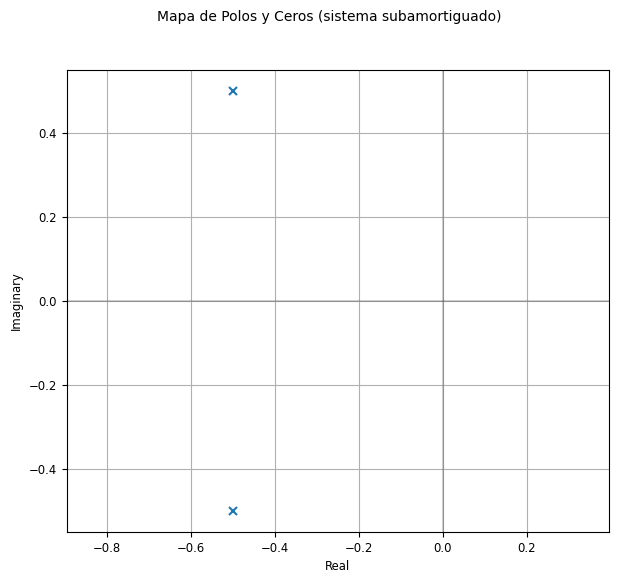

In [2]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_subamortiguado)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_subamortiguado, title='Mapa de Polos y Ceros (sistema subamortiguado)')
plt.grid(True)
plt.show()

#### Paso 3.c) Graficar la respuesta del sistema.

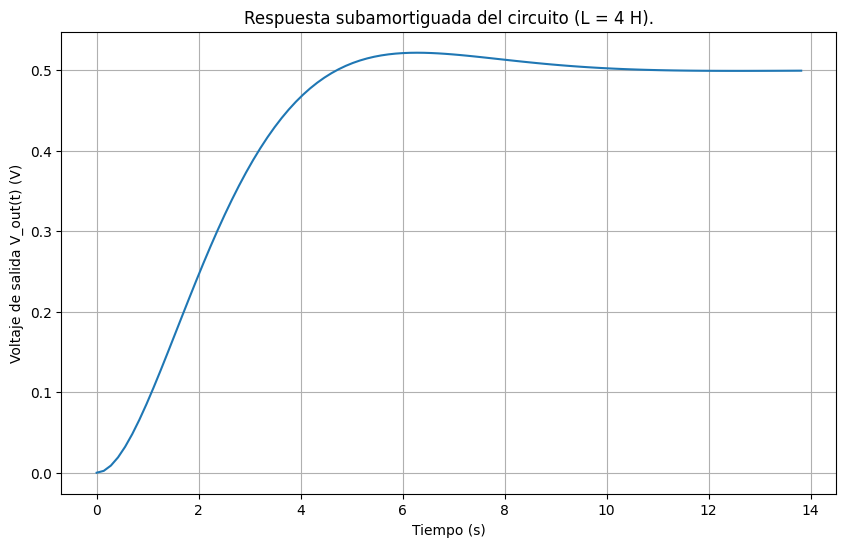

In [3]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_subamortiguado es el vector de la salida V_out(t).
t, vout_subamortiguado = ct.step_response(sistema_subamortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_subamortiguado)
plt.title('Respuesta subamortiguada del circuito (L = 4 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

#### Ejercicio propuesto. Análisis de las respuestas críticamente amortiguada y sobreamortiguada.

Ahora que hemos analizado y simulado el caso subamortiguado, tu tarea es encontrar los valores de $L$ que producen las respuestas críticamente amortiguada y sobreamortiguada.

**Instrucciones:**

1.  **Respuesta Críticamente Amortiguada:**
    Recuerde que la ecuación característica del sistema es:
    $$ \Delta = s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
    
    Manteniendo $R_1 = 2 \, \Omega$, $R_2 = 2 \, \Omega$ y $C = 1 \, F$, determina analíticamente 
    el valor de $L$ que hace que el discriminante del polinomio característico ($b^2-4ac$) sea igual a cero. 
    $$ \implies (L + R_1 R_2 C)^2 - 4 \cdot (LCR_1) \cdot (R_1 + R_2) = 0 $$

    Esto resultará en dos polos negativos, reales e iguales.
    * Muestra tu cálculo en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.
    
2.  **Respuesta Sobreamortiguada:**
    * Elige un valor de $L$ adecuado (valor propuesto con base en el análisis del valor para el caso críticamente amortiguado y el que se propuso al inicio para el caso subamortiguado).
    * Demuestra analíticamente que, con este nuevo valor de $L$, las raíces son dos números reales, distintos y negativos. Incluye este análisis en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.

3.  **Gráfica comparativa:**
    * En una celda final, crea un único script que grafique las tres respuestas (subamortiguada, críticamente amortiguada y sobreamortiguada) en la misma figura.
    * Usa `plt.legend()` para identificar claramente cada curva. Esto te permitirá visualizar directamente cómo el cambio en un solo elemento afecta la dinámica del sistema.

#### Paso 4: Simulación y Análisis para el caso Críticamente Amortiguado.

Consideremos nuevamente los valores del sistema:

$R_1 = 2 \, \Omega$  
$R_2 = 2 \, \Omega$  
$C = 1 \, F$  
$L = L_{critico} \, H$

Nuestro objetivo es determinar el valor de $L$ que haga que el sistema sea **críticamente amortiguado**, es decir, que presente **dos polos reales, negativos e iguales**. Esto se logra cuando el **discriminante del polinomio característico es igual a cero**:

$$ b^2 - 4ac = 0 $$

donde:

$a = L C R_1$  
$b = L + R_1 R_2 C$  
$c = R_1 + R_2$

---

##### *Sustitución de parámetros:*

$a = L \times 1 \times 2 = 2L$  
$b = L + (2)(2)(1) = L + 4$  
$c = 2 + 2 = 4$

Planteando la condición de discriminante nulo:

$$ (L + 4)^2 - 4 (2L)(4) = 0 $$
$$ (L + 4)^2 - 32L = 0 $$
$$ L^2 + 8L + 16 - 32L = 0 $$
$$ L^2 - 24L + 16 = 0 $$

---

##### *Resolviendo la ecuación cuadrática para $L$:*

$$ L = \frac{24 \pm \sqrt{24^2 - 4(1)(16)}}{2(1)} $$
$$ L = \frac{24 \pm \sqrt{576 - 64}}{2} $$
$$ L = \frac{24 \pm \sqrt{512}}{2} $$
$$ \sqrt{512} = 22.6274 $$

$$ L_1 = \frac{24 + 22.6274}{2} \approx 23.314 \, H $$
$$ L_2 = \frac{24 - 22.6274}{2} \approx 0.686 \, H $$

Por lo tanto, existen **dos valores posibles de $L$** que cumplen la condición de discriminante cero:

$$ L_1 = 23.314 \, H \quad \text{y} \quad L_2 = 0.686 \, H $$

---

##### *Análisis de las raíces para $L_1 = 23.314 \, H$*

$a = 2(23.314) = 46.628$  
$b = 23.314 + 4 = 27.314$  
$c = 4$

Con los valores, el polinomio característico es:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2(23.314 \cdot 1 \cdot 2) + s(23.314 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0 $$
$$ 46.628 s^2 + 27.314 s + 4 = 0 $$

Las raíces (polos) se calculan con la fórmula cuadrática:
$$ s = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$
$$ s = \frac{-27.314 \pm \sqrt{0}}{2(46.628)} $$
$$ s = \frac{-27.314}{93.256} \approx -0.292 $$

$$ s_1 = s_2 \approx -0.292 $$
---

##### Análisis de las raíces para $L_2 = 0.686 \, H$

$a = 2(0.686) = 1.372$  
$b = 0.686 + 4 = 4.686$  
$c = 4$

Con los valores, el polinomio característico es:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2(0.686 \cdot 1 \cdot 2) + s(0.686 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0 $$
$$ 1.372 s^2 + 4.686 s + 4 = 0 $$

Las raíces (polos) se calculan con la fórmula cuadrática:
$$ s = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$
$$ s = \frac{-4.686 \pm \sqrt{0}}{2(1.372)} $$
$$ s = \frac{-4.686}{2.744} \approx -1.707 $$

$$ s_1 = s_2 \approx -1.707 $$
---

##### Selección de $L$ y Simulación
Como las raices son reales, negativas e identicas estas generan una **respuesta críticamente amortiguada** pero la ubicacion de los polos es distinta:

Para verificar esta diferencia en la dinámica del sistema, **simularemos ambos casos** y compararemos sus respuestas ante una entrada escalón. Esto nos permitirá visualizar directamente cómo la **inductancia** afecta la velocidad de respuesta del circuito.


#### Paso 4.a) Crear la Función de Transferencia

In [69]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito ---
R1 = 2     # Ohms
R2 = 2     # Ohms
C = 1      # Faradios

# Valores de L para los dos casos
L1 = 23.314   # Henrios (Críticamente amortiguado superior)
L2 = 0.68629 # Henrios (Críticamente amortiguado inferior)

# --- Coeficientes y función de transferencia para L1 ---
num1 = [R2]
den1 = [L1*C*R1, (L1 + R1*R2*C), (R1 + R2)]
sistema_criticamente_amortiguado1 = ct.tf(num1, den1)

# --- Coeficientes y función de transferencia para L2 ---
num2 = [R2]
den2 = [L2*C*R1, (L2 + R1*R2*C), (R1 + R2)]
sistema_criticamente_amortiguado2 = ct.tf(num2, den2)

# Imprimir las funciones de transferencia para verificar
print("Función de Transferencia para L = 23.3137 H:")
print(sistema_criticamente_amortiguado1)
print("\nFunción de Transferencia para L = 0.68629 H:")
print(sistema_criticamente_amortiguado2)


Función de Transferencia para L = 23.3137 H:
<TransferFunction>: sys[71]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             2
  -----------------------
  46.63 s^2 + 27.31 s + 4

Función de Transferencia para L = 0.68629 H:
<TransferFunction>: sys[72]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             2
  -----------------------
  1.373 s^2 + 4.686 s + 4


#### Paso 4.b) Visualizar el mapa de polos y ceros

Las raíces de s (polos) para L = 23.3137 H son:
[-0.29376357+0.j -0.29202179+0.j]

Las raíces de s (polos) para L = 0.68629 H son:
[-1.70923293+0.j -1.70498701+0.j]


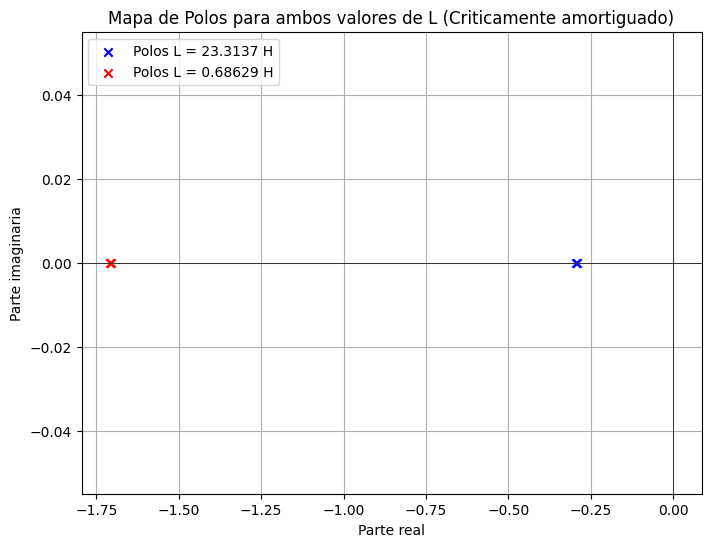

In [70]:
# --- Obtener las raíces de s (Polos del sistema) para ambos casos ---
polos1 = ct.poles(sistema_criticamente_amortiguado1)
polos2 = ct.poles(sistema_criticamente_amortiguado2)

# Imprimir los polos
print("Las raíces de s (polos) para L = 23.3137 H son:")
print(polos1)

print("\nLas raíces de s (polos) para L = 0.68629 H son:")
print(polos2)

# --- Visualización conjunta del mapa de polos ---
plt.figure(figsize=(8, 6))

# Graficar polos para L = 23.3137 H
plt.scatter(polos1.real, polos1.imag, marker='x', color='blue', label='Polos L = 23.3137 H')

# Graficar polos para L = 0.68629 H
plt.scatter(polos2.real, polos2.imag, marker='x', color='red', label='Polos L = 0.68629 H')

plt.title('Mapa de Polos para ambos valores de L (Criticamente amortiguado)')
plt.xlabel('Parte real')
plt.ylabel('Parte imaginaria')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.legend()
plt.show()



#### Paso 4.c) Crear la Función de Transferencia

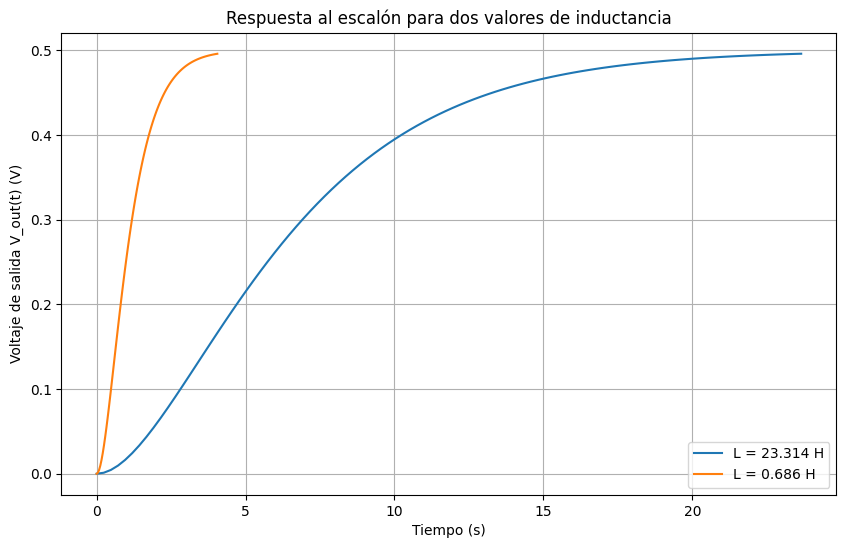

In [71]:
# --- Simulación de la respuesta al escalón unitario para ambos sistemas ---

# Respuesta para L = 23.3137 H
t1, vout_criticamente_amortiguado1 = ct.step_response(sistema_criticamente_amortiguado1)

# Creamos el sistema para L = 0.68629 H
L2 = 0.68629
num2 = [R2]
den2 = [L2*C*R1, (L2 + R1*R2*C), (R1 + R2)]
sistema_criticamente_amortiguado2 = ct.tf(num2, den2)

# Respuesta para L = 0.68629 H
t2, vout_criticamente_amortiguado2 = ct.step_response(sistema_criticamente_amortiguado2)

# --- Graficación conjunta ---
plt.figure(figsize=(10, 6))
plt.plot(t1, vout_criticamente_amortiguado1, label='L = 23.314 H')
plt.plot(t2, vout_criticamente_amortiguado2, label='L = 0.686 H')
plt.title('Respuesta al escalón para dos valores de inductancia')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.legend()
plt.show()


#### Paso 4.d) Comparación de Respuestas Críticamente Amortiguadas

Al comparar ambas respuestas críticamente amortiguadas, se observó que para $ L = 0.686 \, \text{H} $ se obtuvo un **menor tiempo de respuesta**. Por esta razón, se prefiere este valor, ya que permite una respuesta más rápida del sistema sin sobreimpulso.$ L = 0.686 \, \text{H} $ produce polos más alejados del origen sobre el eje real negativo, lo que se traduce en una mayor velocidad de respuesta. Por lo tanto, este valor se considera más eficiente para el comportamiento dinámico del sistema.


#### Paso 5: Simulación y Análisis para el caso sobreamortiguado.

Ahora, vamos a simular el sistema para un conjunto de parámetros que resultan en una **respuesta sobreamortiguada**. Un sistema sobreamortiguado tiene dos raíces reales, distintas y negativas. Esto se logra cuando el **discriminante del polinomio característico es mayor a cero**:  

$$ b^2 - 4ac > 0 $$

por lo tanto: 

$$ b^2 > 4ac $$

donde:

$a = L C R_1\\$
$b = L + R_1 R_2 C\\$
$c = R_1 + R_2\\$



Consideremos los valores del sistema:

$R_1 = 2 \, \Omega$
$R_2 = 2 \, \Omega$
$C = 1 \, F$


Algo que se notó a partir del valor propuesto de la $L_{subamortiguada}$ fue que los valores escogidos dentro del rango de ambas $L_{criticamente\_amortiguada}$ nos dan un par de complejos conjugados ubicados en el semiplano izquierdo. Por ello, al escoger una $L < 0.686$ o $L > 23.31$ se obtiene una respuesta sobreamortiguada. Pero como nuestra inductancia no puede ser negativa, $L_{sobreamortiguada}$ debe ser mayor a 23.31 H, por lo cual se optó por $L = 24\,H$.

##### *Análisis de las raíces para $L = 24\,H$:*

El polinomio característico es:
$$ s^2 (L C R_1) + s (L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2 (24 \cdot 1 \cdot 2) + s (24 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0 $$
$$ 48 s^2 + 28 s + 4 = 0 $$
Dividimos entre 4 para simplificar:
$$ 12 s^2 + 7 s + 1 = 0 $$

Las raíces (polos) se calculan con la fórmula cuadrática:
$$ s = \frac{-b \pm \sqrt{b^2 - 4 a c}}{2 a} $$
$$ s = \frac{-7 \pm \sqrt{7^2 - 4 \cdot 12 \cdot 1}}{2 \cdot 12} $$
$$ s = \frac{-7 \pm \sqrt{49 - 48}}{24} $$
$$ s = \frac{-7 \pm 1}{24} $$

Por lo que se obtiene:

$$ s_1 = \frac{-7 + 1}{24} = \frac{-6}{24} = -0.25 $$

$$ s_2 = \frac{-7 - 1}{24} = \frac{-8}{24} = -\frac{1}{3} \approx -0.3333 $$

Como las raíces son reales, distintas y negativas, la respuesta es **sobreamortiguada**.

---

##### *Análisis de las raíces para $L = 100\,H$:*

El polinomio característico es:
$$ s^2 (100 \cdot 1 \cdot 2) + s (100 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0$$
$$ 200 s^2 + 104 s + 4 = 0 $$
Dividimos entre 4 para simplificar:
 $$ 50 s^2 + 26 s + 1 = 0 $$

Las raíces se calculan así:
$$ s = \frac{-26 \pm \sqrt{26^2 - 4 \cdot 50 \cdot 1}}{2 \cdot 50} $$
$$s = \frac{-26 \pm \sqrt{676 - 200}}{100} $$
$$ s = \frac{-26 \pm \sqrt{476}}{100} $$
$$ s = \frac{-26 \pm 21.817}{100} $$

Por lo que se obtiene:

$$ s_1 = \frac{-26 + 21.817}{100} = \frac{-4.183}{100} = -0.04183 $$

$$ s_2 = \frac{-26 - 21.817}{100} = \frac{-47.817}{100} = -0.47817 $$

Como las raíces son reales, distintas y negativas, la respuesta también es **sobreamortiguada**.


#### Paso 5.a) Crear la Función de Transferencia.

In [41]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito ---
R1 = 2     # Ohms
R2 = 2     # Ohms
C = 1      # Faradios

# --- Caso 1: L = 24 H ---
L = 24     # Henrios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
sistema_sobreamortiguado_24H = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia para L = 24 H es:")
print(sistema_sobreamortiguado_24H)


# --- Caso 2: L = 100 H ---
L = 100    # Henrios

# --- Coeficientes de la Función de Transferencia G(s). ---
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
sistema_sobreamortiguado_100H = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("\nLa Función de Transferencia para L = 100 H es:")
print(sistema_sobreamortiguado_100H)


La Función de Transferencia para L = 24 H es:
<TransferFunction>: sys[39]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

          2
  -----------------
  48 s^2 + 28 s + 4

La Función de Transferencia para L = 100 H es:
<TransferFunction>: sys[40]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

           2
  -------------------
  200 s^2 + 104 s + 4


#### Paso 5.b) Visualizar el mapa de polos y ceros.

Las raíces de s (polos) para L=24H son:
[-0.33333333+0.j -0.25      +0.j]
Las raíces de s (polos) para L=100H son:
[-0.47817424+0.j -0.04182576+0.j]


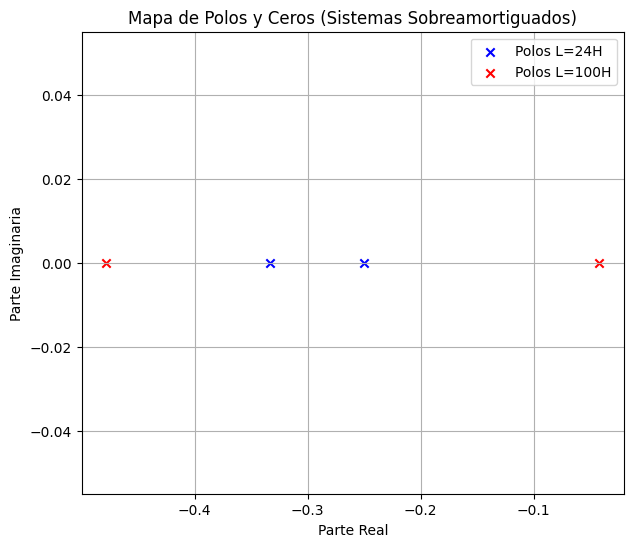

In [45]:
# --- Indicar las raíces de s (Polos del sistema) para L=24H ---
polos_24H = ct.poles(sistema_sobreamortiguado_24H)
print("Las raíces de s (polos) para L=24H son:")
print(polos_24H)

# --- Indicar las raíces de s (Polos del sistema) para L=100H ---
polos_100H = ct.poles(sistema_sobreamortiguado_100H)
print("Las raíces de s (polos) para L=100H son:")
print(polos_100H)

# --- Visualización conjunta del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))

# Graficar polos de L=24H
plt.scatter(polos_24H.real, polos_24H.imag, marker='x', color='blue', label='Polos L=24H')

# Graficar polos de L=100H
plt.scatter(polos_100H.real, polos_100H.imag, marker='x', color='red', label='Polos L=100H')

plt.title('Mapa de Polos y Ceros (Sistemas Sobreamortiguados)')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.legend()
plt.show()


#### Paso 5.c) Graficar la respuesta del sistema.

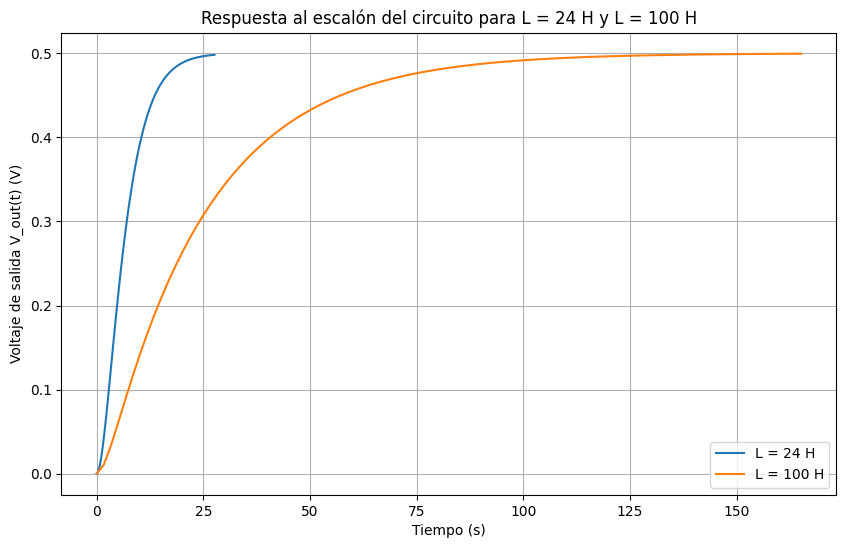

In [48]:
# --- Simulación de la respuesta al escalón unitario para ambos sistemas ---

# Respuesta para L = 24 H
t_24, vout_24 = ct.step_response(sistema_sobreamortiguado_24H)

# Respuesta para L = 100 H
t_100, vout_100 = ct.step_response(sistema_sobreamortiguado_100H)

# --- Graficación conjunta ---
plt.figure(figsize=(10, 6))
plt.plot(t_24, vout_24, label='L = 24 H')
plt.plot(t_100, vout_100, label='L = 100 H')
plt.title('Respuesta al escalón del circuito para L = 24 H y L = 100 H')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.legend()
plt.show()


#### 5.d) Selección del valor de la inductancia &L& para el caso sobreamortiguado

Como vimos en el análisis anterior, para que el sistema sea sobreamortiguado, el valor de la inductancia &L& debe ser mayor que el valor crítico superior, es decir:

$$ L > 23.31\, H $$
Dos valores posibles que cumplen esta condición son:
- &L = 24\, H&
- &L = 100\, H&
Al comparar la respuesta al escalón para estos dos valores, observamos que:

- Para &L = 24\, H&, la respuesta tiene un **tiempo de respuesta más rápido**.
- Para &L = 100\, H&, la respuesta es más lenta, debido a que la inductancia más alta genera una mayor inercia en el sistema.

Por lo tanto, **se escoje &L = 24\, H& porque proporciona una respuesta sobreamortiguada pero con un tiempo de respuesta menor**, lo que puede ser deseable para aplicaciones donde la velocidad de respuesta es importante.


#### Paso 6 Grafica de los tres tipos de respuesta

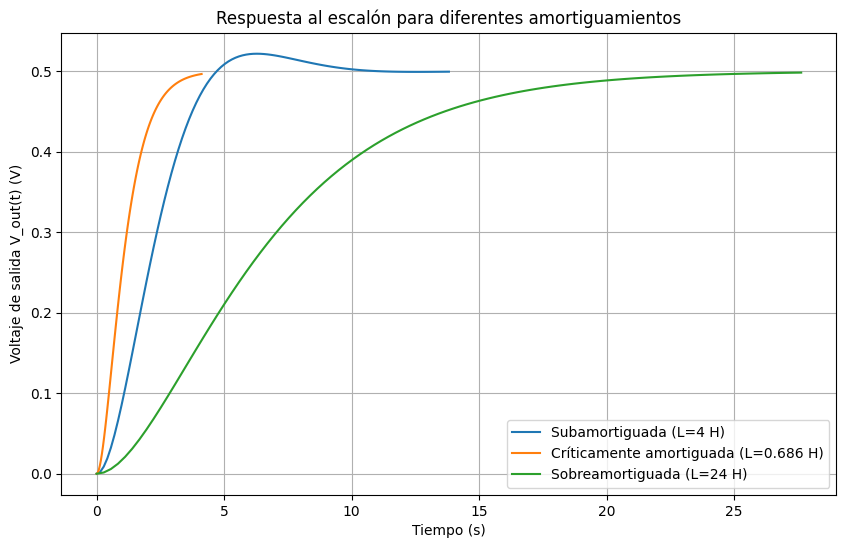

In [72]:
import control as ct
import matplotlib.pyplot as plt

# Parámetros constantes
R1 = 2     # Ohms
R2 = 2     # Ohms
C = 1      # Faradios

# Valores de inductancia para cada caso
L_subamortiguada = 4
L_criticamente_amortiguada = 0.686
L_sobreamortiguada = 24

# Función para crear sistema dado L
def crear_sistema(L):
    num = [R2]
    den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]
    return ct.tf(num, den)

# Crear sistemas
sistema_sub = crear_sistema(L_subamortiguada)
sistema_crit = crear_sistema(L_criticamente_amortiguada)
sistema_sobre = crear_sistema(L_sobreamortiguada)

# Obtener respuestas al escalón
t_sub, y_sub = ct.step_response(sistema_sub)
t_crit, y_crit = ct.step_response(sistema_crit)
t_sobre, y_sobre = ct.step_response(sistema_sobre)

# Graficar respuestas
plt.figure(figsize=(10,6))
plt.plot(t_sub, y_sub, label=f'Subamortiguada (L={L_subamortiguada} H)')
plt.plot(t_crit, y_crit, label=f'Críticamente amortiguada (L={L_criticamente_amortiguada} H)')
plt.plot(t_sobre, y_sobre, label=f'Sobreamortiguada (L={L_sobreamortiguada} H)')

plt.title('Respuesta al escalón para diferentes amortiguamientos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.legend()
plt.show()
